# Crunchbase Analysis

In [39]:
# This dataset includes both companies in both 'EdTech' and 'Education'

import pandas as pd
data2 = pd.read_csv('EdTechCompanies.csv')
data2

,Organization Name,Organization Name URL,Growth Category,Number of Employees,Industries,Headquarters Location,Description,CB Rank (Company),Founders,Number of Founders,...,Founded Date Precision,Investor Type,Estimated Revenue Range,Operating Status,Exit Date,Exit Date Precision,Closed Date,Closed Date Precision,Number of Funding Rounds,Top 5 Investors
0,Prodigy Finance,https://www.crunchbase.com/organization/prodig...,Growing,101-250,"Crowdfunding, Education, Finance, Financial Se...","London, England, United Kingdom",Prodigy Finance provides postgraduate student ...,"2,278","Cameron Stevens, Ryan Steele",2.0,...,day,NaN,$10M to $50M,Active,NaN,NaN,NaN,NaN,8.0,"Citi, Goldman Sachs, Canada Pension Plan Inves..."
1,Perlego,https://www.crunchbase.com/organization/perlego,Growing,51-100,"EBooks, EdTech, Education, Publishing, Subscri...","London, England, United Kingdom",Perlego is an online library that provides stu...,"4,413","Gauthier Van Malderen, Matthew Davis",2.0,...,year,NaN,$1M to $10M,Active,NaN,NaN,NaN,NaN,8.0,"Founders Factory, Raine Ventures, Redbus Ventu..."
2,Yoto,https://www.crunchbase.com/organization/yoto,Growing,51-100,"Audio, Audiobooks, Children, Content, EdTech, ...","London, England, United Kingdom",Yoto - The screen-free audio platform for kids.,"4,615","Ben Drury, Filip Denker",2.0,...,year,NaN,$1M to $10M,Active,NaN,NaN,NaN,NaN,2.0,"JamJar Investments, Global Founders Capital, M..."
3,Zen Educate,https://www.crunchbase.com/organization/zen-ed...,NaN,51-100,"EdTech, Education","London, England, United Kingdom",Zen Educate is an online platform to connect s...,"4,800","Oren Cohen, Slava Kremerman",2.0,...,year,NaN,$10M to $50M,Active,NaN,NaN,NaN,NaN,6.0,"Brighteye Ventures, Ascension Ventures, FJ Lab..."
4,MyTutor,https://www.crunchbase.com/organization/mytuto...,NaN,101-250,"E-Commerce, E-Learning, Education, Tutoring","London, England, United Kingdom",MyTutor offers affordable 1-to-1 tutorials onl...,"7,809","Bertie Hubbard, James Grant, Robert Grabiner",3.0,...,day,NaN,$10M to $50M,Active,NaN,NaN,NaN,NaN,7.0,"SEEK, Mobeus Equity Partners, Upscale, Future ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Primal Pictures,https://www.crunchbase.com/organization/primal...,NaN,11-50,"3D Technology, Education, Publishing","London, England, United Kingdom",Primal Pictures create and publish the world’s...,"575,196",NaN,NaN,...,year,NaN,NaN,Active,2012-10-01,day,NaN,NaN,1.0,YFM Equity Partners
996,Morphotech,https://www.crunchbase.com/organization/morpho...,NaN,51-100,"Consulting, Education, Information Technology,...","Abingdon, Oxfordshire, United Kingdom",UK Bespoke software development provider. Crea...,"575,377",Freddy Elturk,1.0,...,day,NaN,NaN,Active,NaN,NaN,NaN,NaN,NaN,NaN
997,notgoingtouni.co.uk,https://www.crunchbase.com/organization/notgoi...,NaN,1-10,Education,"Buckhurst Hill, Essex, United Kingdom",Notgoingtouni.co.uk is a website shows opportu...,"576,436",Spencer Mehlman,1.0,...,year,NaN,$1M to $10M,Active,NaN,NaN,NaN,NaN,NaN,NaN
998,College of Contract Management,https://www.crunchbase.com/organization/colleg...,NaN,51-100,Education,"Farnham, Surrey, United Kingdom",the College of Contract Management in the Unit...,"577,188",NaN,NaN,...,year,NaN,NaN,Active,NaN,NaN,NaN,NaN,NaN,NaN


## Machine Learning Model

The following model uses publicly available Crunchbase data for predicting scale-up success through a machine learning model.

In [40]:
# Importing the relevant modules 

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [41]:
data2.columns

Index(['Organization Name', 'Organization Name URL', 'Growth Category',
       'Number of Employees', 'Industries', 'Headquarters Location',
       'Description', 'CB Rank (Company)', 'Founders', 'Number of Founders',
       'Last Funding Amount', 'Last Funding Amount Currency',
       'Last Funding Amount (in USD)', 'Last Funding Type', 'Founded Date',
       'Founded Date Precision', 'Investor Type', 'Estimated Revenue Range',
       'Operating Status', 'Exit Date', 'Exit Date Precision', 'Closed Date',
       'Closed Date Precision', 'Number of Funding Rounds', 'Top 5 Investors'],
      dtype='object')

In [42]:
# Some pre-processing for funding stage, as done in previous notebook 
early_stage = ['Pre-Seed', 'Seed', 'Series A']
late_stage = ['Series B', 'Debt Financing', 'Non-equity Assistance', 'Venture - Series Unknown', 
              'Private Equity', 'Grant', 'Equity Crowdfunding', 'Post-IPO Equity', 'Convertible Note', 
              'Undisclosed', 'Post-IPO Debt', 'Corporate Round', 'Secondary Market', 
              'Product Crowdfunding']

# Create a column indicating the stage of the last funding
data2['Funding Stage'] = data2['Last Funding Type'].apply(lambda x: 'Early' if x in early_stage else ('Late' if x in late_stage else 'Other'))

In [43]:
# Some pre-processing to get the numeric employee numbers
def convert_employee_range(employee_range):
    if isinstance(employee_range, str):
        parts = employee_range.split('-')
        if len(parts) == 2:
            return (int(parts[0]) + int(parts[1])) / 2
        elif '1001-5000' in employee_range:
            return 3000
        elif '5001-10000' in employee_range:
            return 7500
        elif '10001+' in employee_range:
            return 10001  
    return None

data2['Number of Employees New'] = data2['Number of Employees'].apply(convert_employee_range)
data2

,Organization Name,Organization Name URL,Growth Category,Number of Employees,Industries,Headquarters Location,Description,CB Rank (Company),Founders,Number of Founders,...,Estimated Revenue Range,Operating Status,Exit Date,Exit Date Precision,Closed Date,Closed Date Precision,Number of Funding Rounds,Top 5 Investors,Funding Stage,Number of Employees New
0,Prodigy Finance,https://www.crunchbase.com/organization/prodig...,Growing,101-250,"Crowdfunding, Education, Finance, Financial Se...","London, England, United Kingdom",Prodigy Finance provides postgraduate student ...,"2,278","Cameron Stevens, Ryan Steele",2.0,...,$10M to $50M,Active,NaN,NaN,NaN,NaN,8.0,"Citi, Goldman Sachs, Canada Pension Plan Inves...",Late,175.5
1,Perlego,https://www.crunchbase.com/organization/perlego,Growing,51-100,"EBooks, EdTech, Education, Publishing, Subscri...","London, England, United Kingdom",Perlego is an online library that provides stu...,"4,413","Gauthier Van Malderen, Matthew Davis",2.0,...,$1M to $10M,Active,NaN,NaN,NaN,NaN,8.0,"Founders Factory, Raine Ventures, Redbus Ventu...",Late,75.5
2,Yoto,https://www.crunchbase.com/organization/yoto,Growing,51-100,"Audio, Audiobooks, Children, Content, EdTech, ...","London, England, United Kingdom",Yoto - The screen-free audio platform for kids.,"4,615","Ben Drury, Filip Denker",2.0,...,$1M to $10M,Active,NaN,NaN,NaN,NaN,2.0,"JamJar Investments, Global Founders Capital, M...",Early,75.5
3,Zen Educate,https://www.crunchbase.com/organization/zen-ed...,NaN,51-100,"EdTech, Education","London, England, United Kingdom",Zen Educate is an online platform to connect s...,"4,800","Oren Cohen, Slava Kremerman",2.0,...,$10M to $50M,Active,NaN,NaN,NaN,NaN,6.0,"Brighteye Ventures, Ascension Ventures, FJ Lab...",Late,75.5
4,MyTutor,https://www.crunchbase.com/organization/mytuto...,NaN,101-250,"E-Commerce, E-Learning, Education, Tutoring","London, England, United Kingdom",MyTutor offers affordable 1-to-1 tutorials onl...,"7,809","Bertie Hubbard, James Grant, Robert Grabiner",3.0,...,$10M to $50M,Active,NaN,NaN,NaN,NaN,7.0,"SEEK, Mobeus Equity Partners, Upscale, Future ...",Late,175.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Primal Pictures,https://www.crunchbase.com/organization/primal...,NaN,11-50,"3D Technology, Education, Publishing","London, England, United Kingdom",Primal Pictures create and publish the world’s...,"575,196",NaN,NaN,...,NaN,Active,2012-10-01,day,NaN,NaN,1.0,YFM Equity Partners,Late,30.5
996,Morphotech,https://www.crunchbase.com/organization/morpho...,NaN,51-100,"Consulting, Education, Information Technology,...","Abingdon, Oxfordshire, United Kingdom",UK Bespoke software development provider. Crea...,"575,377",Freddy Elturk,1.0,...,NaN,Active,NaN,NaN,NaN,NaN,NaN,NaN,Other,75.5
997,notgoingtouni.co.uk,https://www.crunchbase.com/organization/notgoi...,NaN,1-10,Education,"Buckhurst Hill, Essex, United Kingdom",Notgoingtouni.co.uk is a website shows opportu...,"576,436",Spencer Mehlman,1.0,...,$1M to $10M,Active,NaN,NaN,NaN,NaN,NaN,NaN,Other,5.5
998,College of Contract Management,https://www.crunchbase.com/organization/colleg...,NaN,51-100,Education,"Farnham, Surrey, United Kingdom",the College of Contract Management in the Unit...,"577,188",NaN,NaN,...,NaN,Active,NaN,NaN,NaN,NaN,NaN,NaN,Other,75.5


The columns selected for the model include the following: 'Number of Employees New', 'Last Funding Amount (in USD)', 'Founded Date', 'Investor Type', 'Number of Founders', 'Number of Funding Rounds', 'Funding Stage', i.e. the features of our model. 

Next, we do some more preprocessing to ensure all our data is numeric and can be handled by the model. This includes one-hot encoding the categorical 'Investor Type' column to create new binary features, increasing the dimensionality of the model. 

In [44]:
# Selecting the relevant numerical columns 
ml_data = data2[['Number of Employees New', 'Last Funding Amount (in USD)', 'Founded Date', 'Investor Type', 'Number of Founders', 'Number of Funding Rounds', 'Funding Stage']]
ml_data

,Number of Employees New,Last Funding Amount (in USD),Founded Date,Investor Type,Number of Founders,Number of Funding Rounds,Funding Stage
0,175.5,350000000.0,2007-08-22,NaN,2.0,8.0,Late
1,75.5,NaN,2016-01-01,NaN,2.0,8.0,Late
2,75.5,17000000.0,2016-01-01,NaN,2.0,2.0,Early
3,75.5,NaN,2017-01-01,NaN,2.0,6.0,Late
4,175.5,20756993.0,2013-07-01,NaN,3.0,7.0,Late
...,...,...,...,...,...,...,...
995,30.5,NaN,1991-01-01,NaN,NaN,1.0,Late
996,75.5,NaN,2018-05-26,NaN,1.0,NaN,Other
997,5.5,NaN,2008-01-01,NaN,1.0,NaN,Other
998,75.5,NaN,2013-01-01,NaN,NaN,NaN,Other


In [45]:
# Ensuring numeric data
ml_data['Last Funding Amount (in USD)'] = pd.to_numeric(ml_data['Last Funding Amount (in USD)'], errors='coerce')
ml_data['Number of Employees New'] = pd.to_numeric(ml_data['Number of Employees New'], errors='coerce')

# Converting funding stage to numeric
ml_data['Funding Stage'] = ml_data['Funding Stage'].map({'Early': 0, 'Late': 1, 'Other': 2})

# Extracting the year from the 'Founded Date' column
ml_data['Founded Year'] = pd.to_datetime(ml_data['Founded Date'], errors='coerce').dt.year

# One-hot encoding the 'Investor Type' column
ml_data = pd.get_dummies(ml_data, columns=['Investor Type'], prefix='Investor')

del ml_data['Founded Date']

ml_data

/tmp/ipykernel_139/3811197767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data['Last Funding Amount (in USD)'] = pd.to_numeric(ml_data['Last Funding Amount (in USD)'], errors='coerce')
/tmp/ipykernel_139/3811197767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data['Number of Employees New'] = pd.to_numeric(ml_data['Number of Employees New'], errors='coerce')
/tmp/ipykernel_139/3811197767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Number of Employees New,Last Funding Amount (in USD),Number of Founders,Number of Funding Rounds,Funding Stage,Founded Year,Investor_Accelerator,"Investor_Accelerator, Co-Working Space, Entrepreneurship Program, Incubator",Investor_Entrepreneurship Program,"Investor_Entrepreneurship Program, Incubator","Investor_Family Investment Office, Private Equity Firm, Venture Capital","Investor_Fund Of Funds, Private Equity Firm, Venture Capital",Investor_Government Office,Investor_Pension Funds,Investor_University Program,Investor_Venture Capital
0,175.5,350000000.0,2.0,8.0,1,2007.0,False,False,False,False,False,False,False,False,False,False
1,75.5,NaN,2.0,8.0,1,2016.0,False,False,False,False,False,False,False,False,False,False
2,75.5,17000000.0,2.0,2.0,0,2016.0,False,False,False,False,False,False,False,False,False,False
3,75.5,NaN,2.0,6.0,1,2017.0,False,False,False,False,False,False,False,False,False,False
4,175.5,20756993.0,3.0,7.0,1,2013.0,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,30.5,NaN,NaN,1.0,1,1991.0,False,False,False,False,False,False,False,False,False,False
996,75.5,NaN,1.0,NaN,2,2018.0,False,False,False,False,False,False,False,False,False,False
997,5.5,NaN,1.0,NaN,2,2008.0,False,False,False,False,False,False,False,False,False,False
998,75.5,NaN,NaN,NaN,2,2013.0,False,False,False,False,False,False,False,False,False,False


Exploring 'Founded Year':

As originally I got a mean of 2009 but with a standard deviation of 16 years, I decided to filter for only companies founded after 1990 since that aligns more closely with our definition of a scale-up, whilst also not massively restricting our sample size. Companies founded before 1990 are more likely to already be successful companies that have scaled if they are still operating, hence the leaky aspect. However, removing them actually slightly improved the accuracy of the results.

Filtering the dataset to only include startups founded after 1990 to meet our criteria of scale-ups.

In [46]:
# Exploring founding date further to see if its leaky

# Mean of 2009 but a standard deviation of 16 years

# Calculate the average founding year
average_founding_year = ml_data['Founded Year'].mean()
average_founding_year

2009.601226993865

In [47]:
companies_before_2000 = ml_data[ml_data['Founded Year'] < 1990]
companies_before_2000

,Number of Employees New,Last Funding Amount (in USD),Number of Founders,Number of Funding Rounds,Funding Stage,Founded Year,Investor_Accelerator,"Investor_Accelerator, Co-Working Space, Entrepreneurship Program, Incubator",Investor_Entrepreneurship Program,"Investor_Entrepreneurship Program, Incubator","Investor_Family Investment Office, Private Equity Firm, Venture Capital","Investor_Fund Of Funds, Private Equity Firm, Venture Capital",Investor_Government Office,Investor_Pension Funds,Investor_University Program,Investor_Venture Capital
149,175.5,13022647.0,1.0,2.0,1,1971.0,False,False,False,False,False,False,False,False,False,False
235,30.5,1292704.0,NaN,1.0,1,1989.0,False,False,False,False,False,False,False,False,False,False
246,30.5,14905202.0,NaN,1.0,1,1966.0,False,False,False,False,False,False,False,False,False,False
263,30.5,2796724.0,NaN,1.0,1,1975.0,False,False,False,False,False,False,False,False,False,False
302,375.5,334541.0,NaN,2.0,1,1964.0,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,75.5,NaN,NaN,NaN,2,1902.0,False,False,False,False,False,False,False,False,False,False
977,30.5,NaN,NaN,NaN,2,1979.0,False,False,False,False,False,False,False,False,False,False
985,75.5,NaN,3.0,NaN,2,1984.0,False,False,False,False,False,False,False,False,False,False
987,30.5,NaN,NaN,NaN,2,1989.0,False,False,False,False,False,False,False,False,False,False


In [48]:
# Filtering it for Founded Year
ml_data = ml_data.loc[ml_data['Founded Year'] >= 1990]
ml_data

,Number of Employees New,Last Funding Amount (in USD),Number of Founders,Number of Funding Rounds,Funding Stage,Founded Year,Investor_Accelerator,"Investor_Accelerator, Co-Working Space, Entrepreneurship Program, Incubator",Investor_Entrepreneurship Program,"Investor_Entrepreneurship Program, Incubator","Investor_Family Investment Office, Private Equity Firm, Venture Capital","Investor_Fund Of Funds, Private Equity Firm, Venture Capital",Investor_Government Office,Investor_Pension Funds,Investor_University Program,Investor_Venture Capital
0,175.5,350000000.0,2.0,8.0,1,2007.0,False,False,False,False,False,False,False,False,False,False
1,75.5,NaN,2.0,8.0,1,2016.0,False,False,False,False,False,False,False,False,False,False
2,75.5,17000000.0,2.0,2.0,0,2016.0,False,False,False,False,False,False,False,False,False,False
3,75.5,NaN,2.0,6.0,1,2017.0,False,False,False,False,False,False,False,False,False,False
4,175.5,20756993.0,3.0,7.0,1,2013.0,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5.5,NaN,NaN,NaN,2,2018.0,False,False,False,False,False,False,False,False,False,False
995,30.5,NaN,NaN,1.0,1,1991.0,False,False,False,False,False,False,False,False,False,False
996,75.5,NaN,1.0,NaN,2,2018.0,False,False,False,False,False,False,False,False,False,False
997,5.5,NaN,1.0,NaN,2,2008.0,False,False,False,False,False,False,False,False,False,False


In [49]:
# Counting the number of True values 

one_hot_columns = [col for col in ml_data.columns if col.startswith('Investor_')]
true_counts = ml_data[one_hot_columns].sum()
true_counts

Investor_Accelerator                                                           4
Investor_Accelerator, Co-Working Space, Entrepreneurship Program, Incubator    1
Investor_Entrepreneurship Program                                              1
Investor_Entrepreneurship Program, Incubator                                   1
Investor_Family Investment Office, Private Equity Firm, Venture Capital        1
Investor_Fund Of Funds, Private Equity Firm, Venture Capital                   1
Investor_Government Office                                                     1
Investor_Pension Funds                                                         0
Investor_University Program                                                    0
Investor_Venture Capital                                                       5
dtype: int64

Next, we impute missing values as dropping them would seriously reduce our sample size, making it insufficient for training the model.

In [50]:
# Imputing missing values 

median_columns = ['Last Funding Amount (in USD)']
mode_columns = ['Number of Employees New', 'Number of Founders', 'Number of Funding Rounds', 'Founded Year']

# Imputing median for specified columns
for column in median_columns:
    ml_data[column].fillna(ml_data[column].median(), inplace=True)

# Imputing mode for specified columns
for column in mode_columns:
    ml_data[column].fillna(ml_data[column].mode()[0], inplace=True)

ml_data


/tmp/ipykernel_139/566756335.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ml_data[column].fillna(ml_data[column].median(), inplace=True)
/tmp/ipykernel_139/566756335.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data[column].fillna(ml_data[column].median(), inplace=True)
/tmp/ipykernel_139/566756335.py:12: FutureWarning: A valu

,Number of Employees New,Last Funding Amount (in USD),Number of Founders,Number of Funding Rounds,Funding Stage,Founded Year,Investor_Accelerator,"Investor_Accelerator, Co-Working Space, Entrepreneurship Program, Incubator",Investor_Entrepreneurship Program,"Investor_Entrepreneurship Program, Incubator","Investor_Family Investment Office, Private Equity Firm, Venture Capital","Investor_Fund Of Funds, Private Equity Firm, Venture Capital",Investor_Government Office,Investor_Pension Funds,Investor_University Program,Investor_Venture Capital
0,175.5,350000000.0,2.0,8.0,1,2007.0,False,False,False,False,False,False,False,False,False,False
1,75.5,571313.0,2.0,8.0,1,2016.0,False,False,False,False,False,False,False,False,False,False
2,75.5,17000000.0,2.0,2.0,0,2016.0,False,False,False,False,False,False,False,False,False,False
3,75.5,571313.0,2.0,6.0,1,2017.0,False,False,False,False,False,False,False,False,False,False
4,175.5,20756993.0,3.0,7.0,1,2013.0,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5.5,571313.0,1.0,1.0,2,2018.0,False,False,False,False,False,False,False,False,False,False
995,30.5,571313.0,1.0,1.0,1,1991.0,False,False,False,False,False,False,False,False,False,False
996,75.5,571313.0,1.0,1.0,2,2018.0,False,False,False,False,False,False,False,False,False,False
997,5.5,571313.0,1.0,1.0,2,2008.0,False,False,False,False,False,False,False,False,False,False


My target variable will be a binary variable that shows whether a startup reaches the scale-up stage i.e. more than 170 employees (as that's the midpoint of employee range of 101-250). Once a company reaches that headcount, it has definitely grown past the early stage and has a profitable and scalable business model. 

In [51]:
# Defining target variable
ml_data['Is_Scaleup'] = (ml_data['Number of Employees New'] > 170).astype(int)
ml_data

/tmp/ipykernel_139/3689577588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data['Is_Scaleup'] = (ml_data['Number of Employees New'] > 170).astype(int)


,Number of Employees New,Last Funding Amount (in USD),Number of Founders,Number of Funding Rounds,Funding Stage,Founded Year,Investor_Accelerator,"Investor_Accelerator, Co-Working Space, Entrepreneurship Program, Incubator",Investor_Entrepreneurship Program,"Investor_Entrepreneurship Program, Incubator","Investor_Family Investment Office, Private Equity Firm, Venture Capital","Investor_Fund Of Funds, Private Equity Firm, Venture Capital",Investor_Government Office,Investor_Pension Funds,Investor_University Program,Investor_Venture Capital,Is_Scaleup
0,175.5,350000000.0,2.0,8.0,1,2007.0,False,False,False,False,False,False,False,False,False,False,1
1,75.5,571313.0,2.0,8.0,1,2016.0,False,False,False,False,False,False,False,False,False,False,0
2,75.5,17000000.0,2.0,2.0,0,2016.0,False,False,False,False,False,False,False,False,False,False,0
3,75.5,571313.0,2.0,6.0,1,2017.0,False,False,False,False,False,False,False,False,False,False,0
4,175.5,20756993.0,3.0,7.0,1,2013.0,False,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5.5,571313.0,1.0,1.0,2,2018.0,False,False,False,False,False,False,False,False,False,False,0
995,30.5,571313.0,1.0,1.0,1,1991.0,False,False,False,False,False,False,False,False,False,False,0
996,75.5,571313.0,1.0,1.0,2,2018.0,False,False,False,False,False,False,False,False,False,False,0
997,5.5,571313.0,1.0,1.0,2,2008.0,False,False,False,False,False,False,False,False,False,False,0


In [52]:
ml_data['Is_Scaleup'].sum()

96

In [53]:
# Deleting the leaky number of employees column
del ml_data['Number of Employees New']
ml_data

,Last Funding Amount (in USD),Number of Founders,Number of Funding Rounds,Funding Stage,Founded Year,Investor_Accelerator,"Investor_Accelerator, Co-Working Space, Entrepreneurship Program, Incubator",Investor_Entrepreneurship Program,"Investor_Entrepreneurship Program, Incubator","Investor_Family Investment Office, Private Equity Firm, Venture Capital","Investor_Fund Of Funds, Private Equity Firm, Venture Capital",Investor_Government Office,Investor_Pension Funds,Investor_University Program,Investor_Venture Capital,Is_Scaleup
0,350000000.0,2.0,8.0,1,2007.0,False,False,False,False,False,False,False,False,False,False,1
1,571313.0,2.0,8.0,1,2016.0,False,False,False,False,False,False,False,False,False,False,0
2,17000000.0,2.0,2.0,0,2016.0,False,False,False,False,False,False,False,False,False,False,0
3,571313.0,2.0,6.0,1,2017.0,False,False,False,False,False,False,False,False,False,False,0
4,20756993.0,3.0,7.0,1,2013.0,False,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,571313.0,1.0,1.0,2,2018.0,False,False,False,False,False,False,False,False,False,False,0
995,571313.0,1.0,1.0,1,1991.0,False,False,False,False,False,False,False,False,False,False,0
996,571313.0,1.0,1.0,2,2018.0,False,False,False,False,False,False,False,False,False,False,0
997,571313.0,1.0,1.0,2,2008.0,False,False,False,False,False,False,False,False,False,False,0


In [54]:
# Test-train split

# Defining the target variable
X = ml_data.drop('Is_Scaleup', axis=1)
y = ml_data['Is_Scaleup']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (726, 15)
Testing set shape: (182, 15)


In [55]:
X_test

,Last Funding Amount (in USD),Number of Founders,Number of Funding Rounds,Funding Stage,Founded Year,Investor_Accelerator,"Investor_Accelerator, Co-Working Space, Entrepreneurship Program, Incubator",Investor_Entrepreneurship Program,"Investor_Entrepreneurship Program, Incubator","Investor_Family Investment Office, Private Equity Firm, Venture Capital","Investor_Fund Of Funds, Private Equity Firm, Venture Capital",Investor_Government Office,Investor_Pension Funds,Investor_University Program,Investor_Venture Capital
949,571313.0,1.0,1.0,2,1993.0,False,False,False,False,False,False,False,False,False,False
452,361182.0,2.0,1.0,0,2015.0,False,False,False,False,False,False,False,False,False,False
350,309125.0,1.0,1.0,1,2013.0,False,False,False,False,False,False,False,False,False,False
788,571313.0,2.0,1.0,2,2001.0,False,False,False,False,False,False,False,False,False,False
849,571313.0,1.0,2.0,0,2011.0,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,571313.0,1.0,1.0,2,1993.0,False,False,False,False,False,False,False,False,False,False
952,571313.0,1.0,1.0,2,2000.0,False,False,False,False,False,False,False,False,False,False
459,39515.0,1.0,1.0,1,2010.0,False,False,False,False,False,False,False,False,False,False
850,571313.0,3.0,1.0,2,2023.0,False,False,False,False,False,False,False,False,False,False


Random Forest is a tree-based model and hence does not require feature scaling, so no feature scaling was done. 

In [56]:
# Feature Scaling -- not necessary

# from sklearn.preprocessing import StandardScaler

# # Identify numerical columns for scaling
# numerical_columns = ['Number of Employees New', 'Last Funding Amount (in USD)', 'Number of Founders', 'Number of Funding Rounds', 'Founded Year']

# scaler = StandardScaler()

# # Fit the scaler on the training data
# X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# # Transform the test data using the fitted scaler
# X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [57]:
# Using Random Forest 

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9011
Confusion Matrix:
[[161   4]
 [ 14   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       165
           1       0.43      0.18      0.25        17

    accuracy                           0.90       182
   macro avg       0.67      0.58      0.60       182
weighted avg       0.87      0.90      0.88       182



In [58]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0])

In [59]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9010989010989011

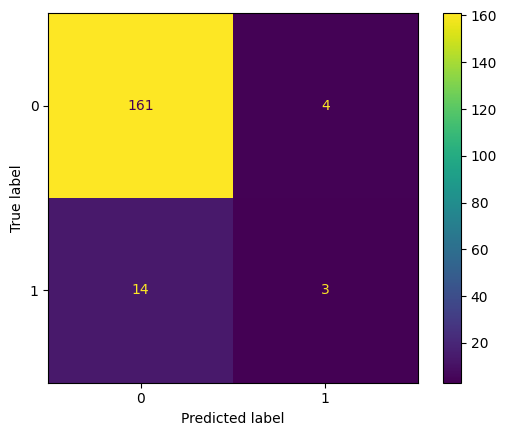

In [60]:
# 3 True Positives
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [61]:
# Using logistic regression - no meaningful results, didn't predict any True values

clf = LogisticRegression(penalty=None).fit(X_train, y_train)
print('Intercept', clf.intercept_)
print('Coefficients', clf.coef_)

Intercept [-5.36878008e-07]
Coefficients [[ 2.75338834e-08 -8.46840958e-07 -9.07727716e-07 -5.57064451e-07
  -1.08166395e-03 -3.78757931e-09  0.00000000e+00  9.50356863e-10
   0.00000000e+00 -9.48436057e-10  0.00000000e+00  9.50357593e-10
   0.00000000e+00  0.00000000e+00 -2.84338746e-09]]


In [62]:
predicted = clf.predict(X_test)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [63]:
metrics.accuracy_score(y_test, predicted)

0.9065934065934066

In [64]:
report_logistic = classification_report(y_test, predicted)
report_logistic

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95       165\n           1       0.00      0.00      0.00        17\n\n    accuracy                           0.91       182\n   macro avg       0.45      0.50      0.48       182\nweighted avg       0.82      0.91      0.86       182\n'

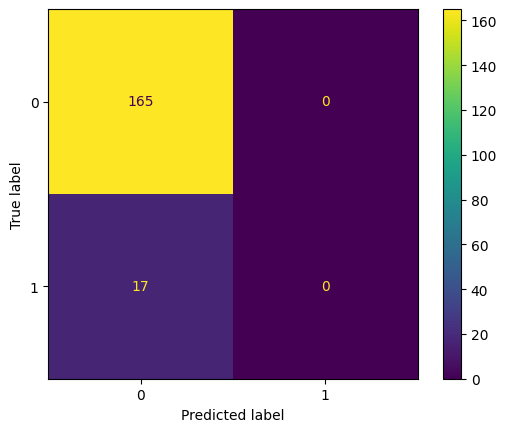

In [65]:
# Zero true positives
ConfusionMatrixDisplay(confusion_matrix(y_test, predicted)).plot()

In [66]:
# Using XGBoost - need to install within the notebook on my machine

!pip install shap xgboost
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(accuracy) 

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print(class_report)

0.8846153846153846
[[157   8]
 [ 13   4]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       165
           1       0.33      0.24      0.28        17

    accuracy                           0.88       182
   macro avg       0.63      0.59      0.61       182
weighted avg       0.87      0.88      0.88       182



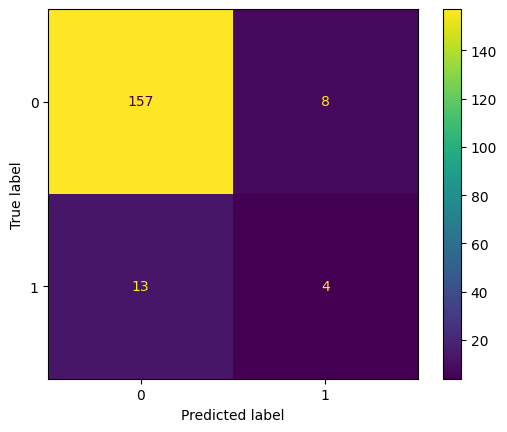

In [67]:
# Slightly better result
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

The SHAP plot shows that Founded Year, Funding Amount and Number of Funding Rounds have the highest predictive power. Care has been taken to prevent target leakage and a small range of features are used to limit complexity, whilst not compromising on predictive power. The features included within the model are all variables that will be known in the context of a scale-up. Because of its distinctiveness from an early-stage startup, data on founded date, number of founders, number of funding rounds and exact funding amount are all publicly disclosed in the case of scale-ups that have been operating likely for several years since their inception. 


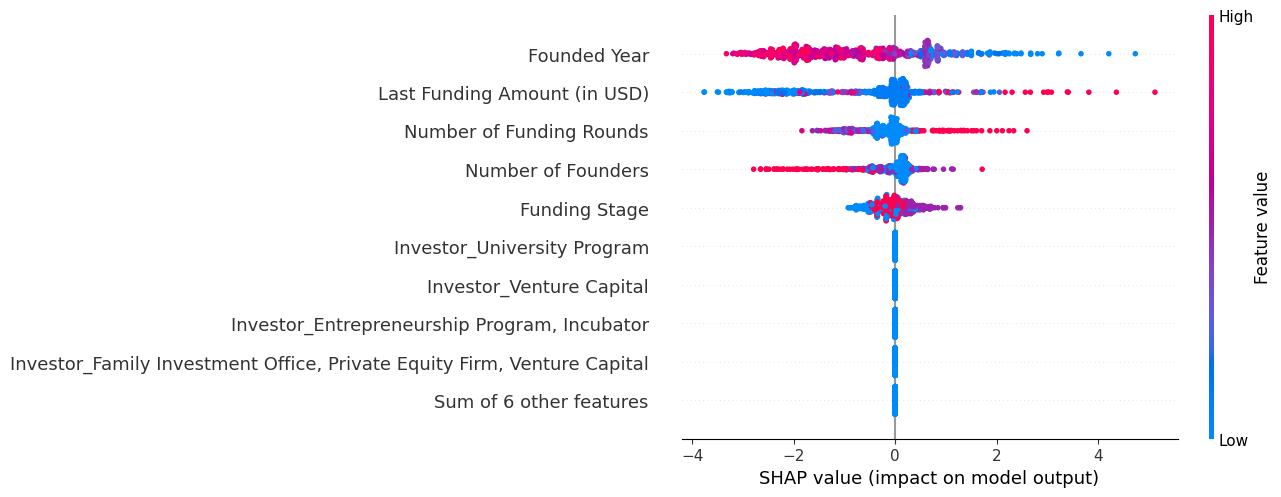

In [68]:
# Creating a SHAP plot 
import shap
explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

In [69]:
# Hyperparameter tuning

# Define the model with class weights to account for the class imbalance
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [50],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2],
    'max_features': [3],
    'bootstrap': [True, False]
}

# grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_
best_rf_model


RandomForestClassifier(class_weight='balanced', max_depth=50, max_features=3,
                       random_state=42)

In [70]:
# Finding the best parameters
best_params = grid_search.best_params_
best_params

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [71]:
# Best results so far - 5 True Positives 

best_rf_model.fit(X_train, y_train)

y_pred_tuned = best_rf_model.predict(X_test)

# Showing metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {accuracy_tuned:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:")
print(conf_matrix)


class_report = classification_report(y_test, y_pred_tuned)
print("Classification Report:")
print(class_report)

Accuracy: 0.8352
Confusion Matrix:
[[147  18]
 [ 12   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       165
           1       0.22      0.29      0.25        17

    accuracy                           0.84       182
   macro avg       0.57      0.59      0.58       182
weighted avg       0.86      0.84      0.85       182



In [73]:
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
conf_matrix

array([[147,  18],
       [ 12,   5]])

To recap, in this analysis we tested different ML models to find the most appriopriate one. The final Random Forest model after class weights and hyperparameter tuning showed promising results, with 5 True positives and and 83.5% accuracy. Logistic regression wasn't appropriate in this context, probably since it needed feature scaling and none was done. Generally, all models perform well in terms of accuracy. The confusion matrix and class reports show that the overall model performance is less promising, when taking into account the macro avg using the precision, recall, f-1 scores across both classes (0 and 1). The model performs well on the majority class (class 0) but poorly on the minority class (class 1) due to a class imbalance (far fewer True values for our target variable). 
